## Linear Regression on Boston Housing Dataset - TDS

Extraído de https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

In [1]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [2]:
# load the housing data from the scikit-learn library
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [8]:
# understand what it contains
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [4]:
print(boston_dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
# load the data into a pandas dataframe
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# The prices of the house indicated by the variable MEDV is our target variable and the
# remaining are the feature variables based on which we will predict the value of a house.

# create a new column of target values and add it to the dataframe
boston['MEDV'] = boston_dataset.target

In [10]:
# see if there are any missing values in the data

# count the number of missing values for each feature
boston.isnull().sum()

# (there are no missing values in this dataset)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


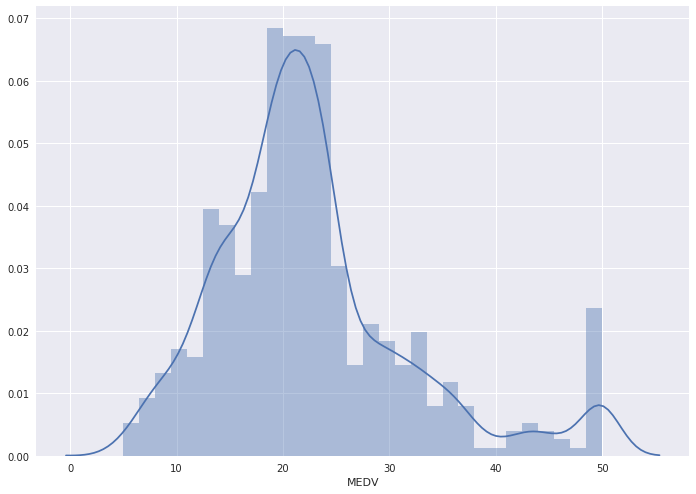

In [11]:
# Exploratory Data Analysis is a very important step before training the model

# use some visualizations to understand the relationship of the target variable with other features

# plot the distribution of the target variable MEDV
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

# (the values of MEDV are distributed normally with few outliers)

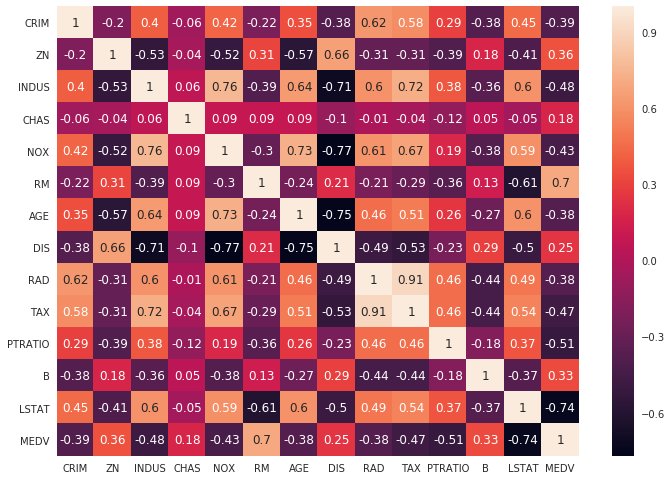

In [12]:
# create a correlation matrix that measures the linear relationships between the variables

correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

# The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that
# there is a strong positive correlation between the two variables. When it is close to -1,
# the variables have a strong negative correlation.

### Observations:
- To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).
- An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

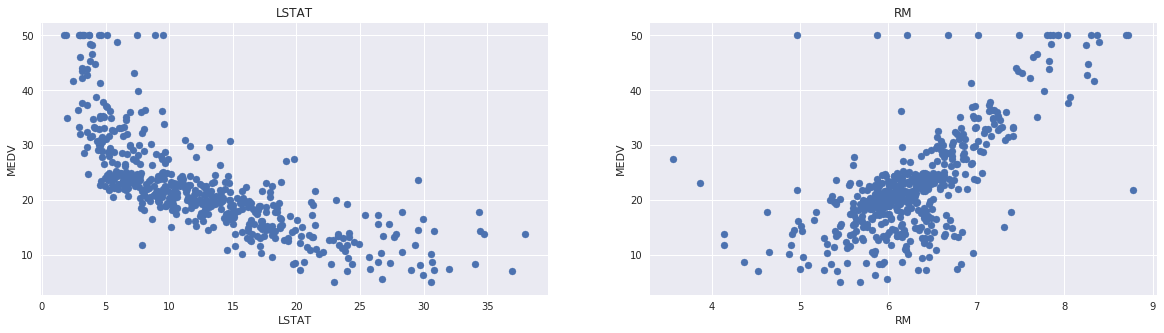

In [13]:
# Based on the above observations we will RM and LSTAT as our features.

# Using a scatter plot let’s see how these features vary with MEDV.

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### Observations:
- The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
- The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

In [14]:
# concatenate the LSTAT and RM columns using np.c_ provided by the numpy library
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT', 'RM'])
Y = boston['MEDV']

In [15]:
X.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [16]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [17]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

# We train the model with 80% of the samples and test with the remaining 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [19]:
X_train.describe()

,LSTAT,RM
count,404.000000,404.000000
mean,12.478045,6.288455
std,7.038575,0.692931
min,1.730000,3.561000
25%,6.840000,5.888000
50%,11.160000,6.209000
75%,16.992500,6.629250
max,37.970000,8.780000


In [20]:
Y_train.describe()

count    404.000000
mean      22.646782
std        9.279809
min        5.000000
25%       17.075000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [28]:
# use scikit-learn’s LinearRegression to train our model on both the training and test sets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
lin_model.coef_

array([-0.71722954,  4.58938833])

In [30]:
lin_model.intercept_

2.736240342606628

In [31]:
# evaluate our model using RMSE and R2-score

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


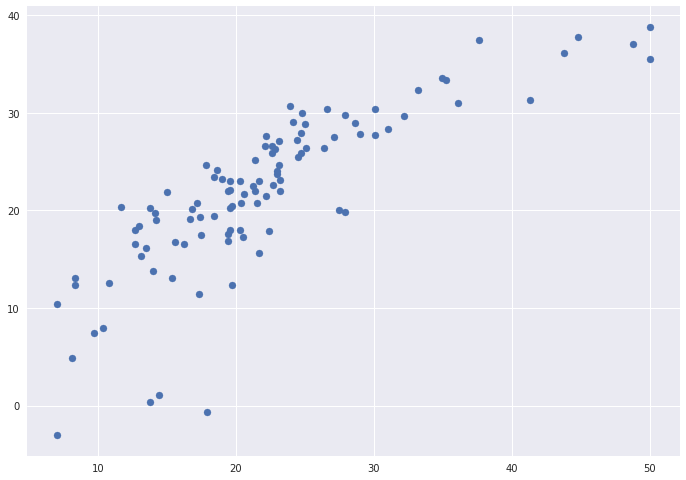

In [32]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()